# Calibration Curve

Calibration curves are used to evaluate how calibrated a classifier is i.e., how the probabilities of predicting each class label differ. The x-axis represents the average predicted probability in each bin. The y-axis is the ratio of positives (the proportion of positive predictions).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
np.set_printoptions(precision =3, suppress=True)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

Text(0, 0.5, 'Observed positive in bin')

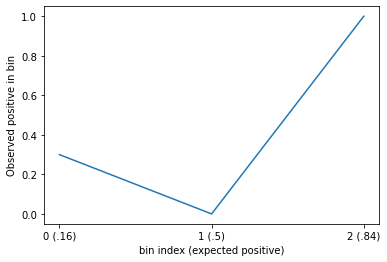

In [5]:
# toy plot

plt.plot([.3, 0, 1])
plt.xticks((0,1,2), ('0 (.16)', '1 (.5)', '2 (.84)'))
plt.xlabel('bin index (expected positive)')
plt.ylabel('Observed positive in bin')

# Illustration with the ForestCover/Covertype dataset

The original ForestCover/Covertype dataset from UCI machine learning repository is a multiclass classification dataset. It is used in predicting forest cover type from cartographic variables only (no remotely sensed data).

* This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices. 

* This dataset has 54 attributes (10 quantitative variables, 4 binary wilderness areas and 40 binary soil type variables). Here, outlier detection dataset is created using only 10 quantitative attributes. Instances from class 2 are considered as normal points and instances from class 4 are anomalies. The anomalies ratio is 0.9%. Instances from the other classes are omitted.

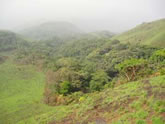

In [9]:
from sklearn.datasets import fetch_covtype
from sklearn.utils import check_array

def load_data(dtype=np.float32, order='C', random_state=13):
    # loading covertype datasets (download from the web might take awhile)
    data = fetch_covtype(download_if_missing=True, shuffle=True, random_state=random_state)
    X = check_array(data['data'], dtype=dtype, order=order)
    
    y = (data['target'] != 1).astype(np.int)
    
    # Create train-test split (as [Joachims, 2006])
    
    n_train = 522911

    X_train = X[:n_train]
    y_train = y[:n_train]
    X_test = X[n_train:]
    y_test = y[n_train:]
    
    # Standardize first 10 features (the numerical ones)
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    mean[10:] = 0.0
    std[10:] = 1.0
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = load_data()
# subsample training set by a factor of 10:

X_train = X_train[::10]
y_train = y_train[::10]

In [10]:
X_train

array([[ 0.853,  1.076, -0.95 , ...,  0.   ,  0.   ,  0.   ],
       [-0.115,  0.674, -0.148, ...,  0.   ,  0.   ,  0.   ],
       [ 0.303, -0.926, -0.816, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [-0.4  , -0.533, -0.549, ...,  0.   ,  0.   ,  0.   ],
       [ 0.032,  1.487, -0.816, ...,  0.   ,  0.   ,  0.   ],
       [ 1.371, -1.141, -0.415, ...,  1.   ,  0.   ,  0.   ]],
      dtype=float32)

In [11]:
# Using logisticRegressionCV

In [13]:
from sklearn.linear_model import LogisticRegressionCV
print(X_train.shape)
print(np.bincount(y_train))
l_model = LogisticRegressionCV().fit(X_train, y_train)

(52292, 54)
[19036 33256]


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

In [14]:
l_model.C_

array([10000.])

In [16]:
print(l_model.predict_proba(X_test)[:10])
print(y_test[:10])

[[0.681 0.319]
 [0.049 0.951]
 [0.706 0.294]
 [0.537 0.463]
 [0.819 0.181]
 [0.    1.   ]
 [0.794 0.206]
 [0.676 0.324]
 [0.727 0.273]
 [0.597 0.403]]
[0 1 0 1 1 1 0 0 0 1]


In [17]:
from sklearn.calibration import calibration_curve
probs = l_model.predict_proba(X_test)[:,1]
prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=5)
print(prob_true)
print(prob_pred)

[0.2   0.303 0.459 0.71  0.933]
[0.138 0.306 0.498 0.701 0.926]


# Illustrations

Text(0.5, 1.0, 'n_bins=5')

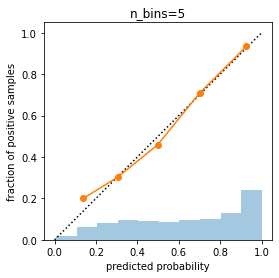

In [19]:
def plot_calibration_curve(y_true, y_prob, n_bins=5, ax=None, hist=True, normalize=False ):
    prob_true, prob_pred =calibration_curve(y_true, y_prob, n_bins=n_bins, normalize=normalize)
    
    if ax is None:
        ax = plt.gca()
    if hist:
        ax.hist(y_prob, weights=np.ones_like(y_prob) / len(y_prob), alpha =.4,
               bins = np.maximum(10, n_bins))
        ax.plot([0, 1], [0, 1], ':', c='k')
    curve = ax.plot(prob_pred, prob_true, marker="o")

    ax.set_xlabel("predicted probability")
    ax.set_ylabel("fraction of positive samples")

    ax.set(aspect='equal')
    return curve

plot_calibration_curve(y_test, probs)
plt.title('n_bins=5')

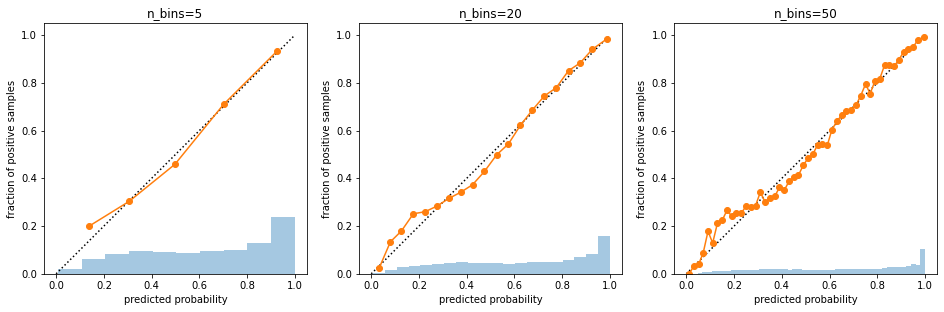

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
for ax, n_bins in zip(axes, [5, 20, 50]):
    plot_calibration_curve(y_test, probs, n_bins=n_bins, ax=ax)
    ax.set_title("n_bins={}".format(n_bins))


# checking the calibration of different algorithms

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

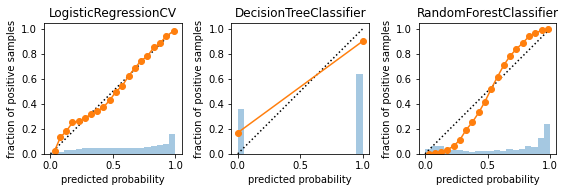

In [22]:
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
fig, axes = plt.subplots(1, 3, figsize=(8, 8))
for ax, clf in zip(axes, [LogisticRegressionCV(), DecisionTreeClassifier(),
                          RandomForestClassifier(n_estimators=100)]):
        # use predict_proba is the estimator has it
        scores = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
        plot_calibration_curve(y_test, scores, n_bins=20, ax=ax)
        ax.set_title(clf.__class__.__name__)

plt.tight_layout()

# importing Calibration from sklearn

In [23]:
from sklearn.calibration import CalibratedClassifierCV
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train,
                                                          stratify=y_train, random_state=0)

In [24]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train_sub, y_train_sub)
scores = rf.predict_proba(X_test)[:, 1]

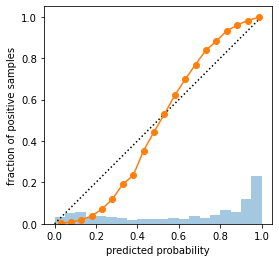

In [26]:
plot_calibration_curve(y_test, scores, n_bins=20)


# sigmoid and isotonic methods

In [27]:
cal_rf = CalibratedClassifierCV(rf, cv="prefit", method='sigmoid')
cal_rf.fit(X_val, y_val)
scores_sigm = cal_rf.predict_proba(X_test)[:, 1]

cal_rf_iso = CalibratedClassifierCV(rf, cv="prefit", method='isotonic')
cal_rf_iso.fit(X_val, y_val)
scores_iso = cal_rf_iso.predict_proba(X_test)[:, 1]

In [28]:
scores_rf = cal_rf.predict_proba(X_val)

Text(0, 0.5, 'True validation label')

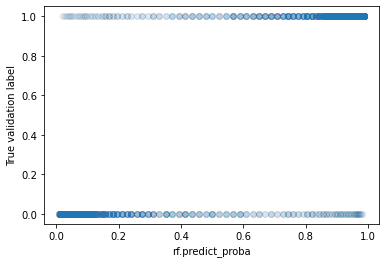

In [30]:
plt.plot(scores_rf[:, 1], y_val, 'o', alpha =.01)
plt.xlabel('rf.predict_proba')
plt.ylabel('True validation label')


In [31]:
sigm = cal_rf.calibrated_classifiers_[0].calibrators_[0]
scores_rf_sorted = np.sort(scores_rf[:, 1])
sigm_scores = sigm.predict(scores_rf_sorted)

In [32]:
iso = cal_rf_iso.calibrated_classifiers_[0].calibrators_[0]
iso_scores = iso.predict(scores_rf_sorted)

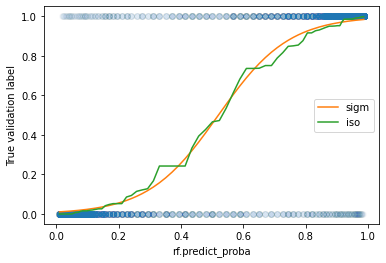

In [33]:
plt.plot(scores_rf[:, 1], y_val, 'o', alpha=.01)
plt.plot(scores_rf_sorted, sigm_scores, label='sigm')
plt.plot(scores_rf_sorted, iso_scores, label='iso')

plt.xlabel("rf.predict_proba")
plt.ylabel("True validation label")
plt.legend()

# comparing the two

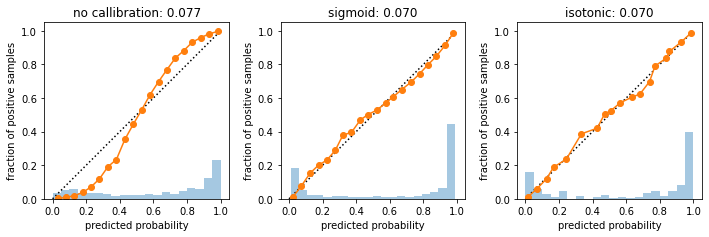

In [36]:
from sklearn.metrics import brier_score_loss

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for name, s, ax in zip(['no callibration', 'sigmoid', 'isotonic'],
                       [scores, scores_sigm, scores_iso], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

# more on Isotonic
Isotonic Regression is a more powerful calibration method that can correct any monotonic distortion. ... A learning curve analysis shows that Isotonic Regression is more prone to overfitting, and thus performs worse than Platt Scaling, when data is scarce. — Predicting Good Probabilities With Supervised Learning